<a href="https://colab.research.google.com/github/Arman-1994/Experimental-Place/blob/master/Fashion_Prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Images of Clothing

In [1]:
pip install --upgrade tensorflow-gpu

Requirement already up-to-date: tensorflow-gpu in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [2]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.3.2)


In [0]:
import tensorflow as tf
import numpy as np
import seaborn as sns

In [0]:
import matplotlib.pyplot as plt

## Import the Fashion MNIST dataset

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("Dataset Imported")

Dataset Imported


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:

print("Number of training examples: {}".format(train_images.shape[0]))
print("Number of test examples:     {}".format(test_images.shape[0]))

Number of training examples: 60000
Number of test examples:     10000


## Preprocess the data

The value of each pixel in the image data is an integer in the range `[0,255]`. For the model to work properly, these values need to be normalized to the range `[0,1]`. So here we create a normalization function, and then apply it to each image in the test and train datasets.

In [0]:
train_images = train_images / 255
test_images = test_images / 255

### Explore the processed data

Let's plot an image to see what it looks like.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'T-shirt/top')

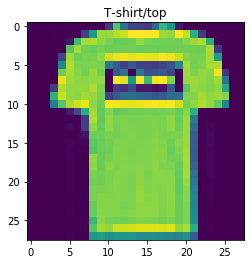

In [10]:
# Give image no here
img_no = 1

plt.imshow(train_images[img_no])
plt.title(class_names[train_labels[img_no]])

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

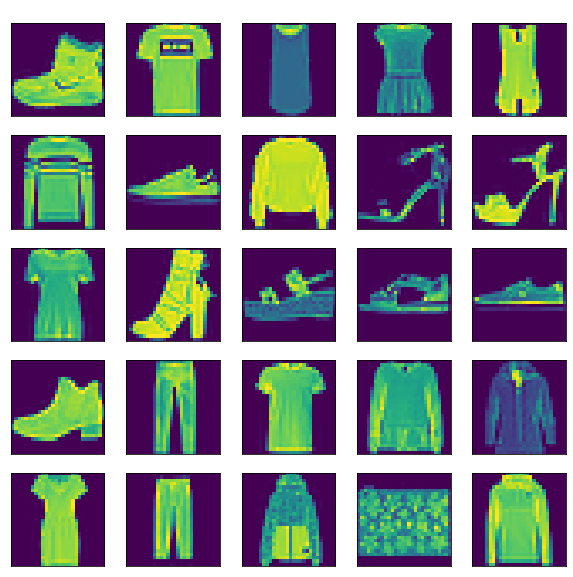

In [11]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i])
  plt.title(class_names[train_labels[i]],color = "white")
  plt.xticks([])
  plt.yticks([])  

## Build the model


In [0]:
from tensorflow.keras.layers import Dropout, Dense, Flatten

In [0]:
model = tf.keras.Sequential()
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation="softmax"))

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [0]:
batch_size = 32
epochs = 10

In [16]:
history = model.fit(x=train_images, y=train_labels, batch_size=batch_size, epochs=epochs,validation_split=.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 93us/sample - loss: 0.5106 - accuracy: 0.8224 - val_loss: 0.4109 - val_accuracy: 0.8551
Epoch 2/10
48000/48000 [==============================] - 4s 83us/sample - loss: 0.3872 - accuracy: 0.8606 - val_loss: 0.3998 - val_accuracy: 0.8569
Epoch 3/10
48000/48000 [==============================] - 4s 82us/sample - loss: 0.3443 - accuracy: 0.8748 - val_loss: 0.3587 - val_accuracy: 0.8726
Epoch 4/10
48000/48000 [==============================] - 4s 84us/sample - loss: 0.3176 - accuracy: 0.8843 - val_loss: 0.3453 - val_accuracy: 0.8785
Epoch 5/10
48000/48000 [==============================] - 4s 80us/sample - loss: 0.2992 - accuracy: 0.8906 - val_loss: 0.3513 - val_accuracy: 0.8732
Epoch 6/10
48000/48000 [==============================] - 4s 86us/sample - loss: 0.2844 - accuracy: 0.8956 - val_loss: 0.3457 - val_accuracy: 0.8751
Epoch 7/10
48000/48000 [==============================] 

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

In [0]:
# history.history

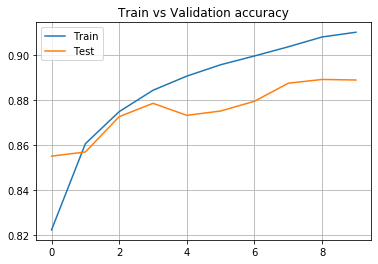

In [18]:
plt.plot(range(0,epochs),
        history.history["accuracy"])
plt.plot(range(0,epochs),
        history.history["val_accuracy"])
plt.title("Train vs Validation accuracy")
plt.legend(["Train","Test"])
plt.grid()

## Evaluate accuracy

Next, compare how the model performs on the test dataset. Use all examples we have in the test dataset to assess accuracy.

In [19]:
test_loss, test_accuracy = model.evaluate(x=test_images, y = test_labels, batch_size=batch_size)
print('Accuracy on test dataset:', test_accuracy)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.3374 - accuracy: 0.8788
Accuracy on test dataset: 0.8788


As it turns out, the accuracy on the test dataset is smaller than the accuracy on the training dataset. This is completely normal, since the model was trained on the `train_dataset`. When the model sees images it has never seen during training, (that is, from the `test_dataset`), we can expect performance to go down. 

## Make predictions and explore

With the model trained, we can use it to make predictions about some images.

In [0]:
# returns the index of max probability
class_predicter = model.predict(x= (test_images))

Model Prediction Sneaker


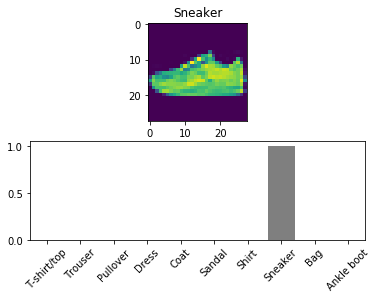

In [21]:
image_no = 104
plt.subplot(2,1,1)
plt.imshow(test_images[image_no])
plt.title( class_names[test_labels[image_no]])
plt.subplot(2,1,2)
sns.barplot(x=class_names,y=class_predicter[image_no])
plt.xticks(rotation=45)
print("Model Prediction",class_names[ np.argmax(class_predicter[image_no]) ])